In [44]:
import os
import random
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import csv
import matplotlib

# Kripto Çiftlerini TXT Dosyasından Rastgele Seç
with open("usd_pairs.txt", "r") as file:
    crypto_list = [line.strip().replace("USDT", "-USD") for line in file.readlines()[0:]]
random.shuffle(crypto_list)

In [45]:
crypto = crypto_list[0]
data = yf.download(crypto, period="1y", interval="1d")
data.reset_index(inplace=True)
data.columns = ["Datetime" ,"Open", "High", "Low", "Close", "Volume"]

[*********************100%***********************]  1 of 1 completed


In [46]:
data["Maksimum Kar"] = data["High"] / data["Close"].shift(1)
data

,Datetime,Open,High,Low,Close,Volume,Maksimum Kar
0,2024-04-11,172.576370,176.235519,170.393433,173.437363,2712334365,NaN
1,2024-04-12,153.635468,175.808640,145.516388,172.576370,4727185451,1.013672
2,2024-04-13,139.341690,154.943954,119.833344,153.634476,8976793985,0.897828
3,2024-04-14,151.284943,152.501007,131.287170,139.341690,7110974218,0.992622
4,2024-04-15,138.508621,155.961166,134.572556,151.299438,5699439234,1.119271
...,...,...,...,...,...,...,...
361,2025-04-07,106.902779,111.471985,96.588066,105.712013,8644174246,0.926936
362,2025-04-08,105.512192,112.298935,103.144524,106.905266,5353641480,1.062310
363,2025-04-09,119.057541,120.470772,101.434738,105.509590,7096350476,1.126893
364,2025-04-10,112.803925,119.082558,108.601692,119.062286,4310698523,1.128642


In [47]:
max_profit_stats = data["Maksimum Kar"].describe()
print("Maksimum Kar İstatistikleri:")
print(max_profit_stats)

Maksimum Kar İstatistikleri:
count    365.000000
mean       1.033487
std        0.056744
min        0.820170
25%        0.999013
50%        1.027828
75%        1.062675
max        1.340197
Name: Maksimum Kar, dtype: float64


In [48]:
crypto

'SOL-USD'

In [49]:
high_potential = data[data["Maksimum Kar"] > 1.01]
low_volatility = data[data["Maksimum Kar"] < 1.02]


print(f"Yüksek potansiyel gün sayısı (>1.05): {len(high_potential)}")
print(f"Düşük volatilite gün sayısı (<1.02): {len(low_volatility)}")

Yüksek potansiyel gün sayısı (>1.05): 235
Düşük volatilite gün sayısı (<1.02): 155


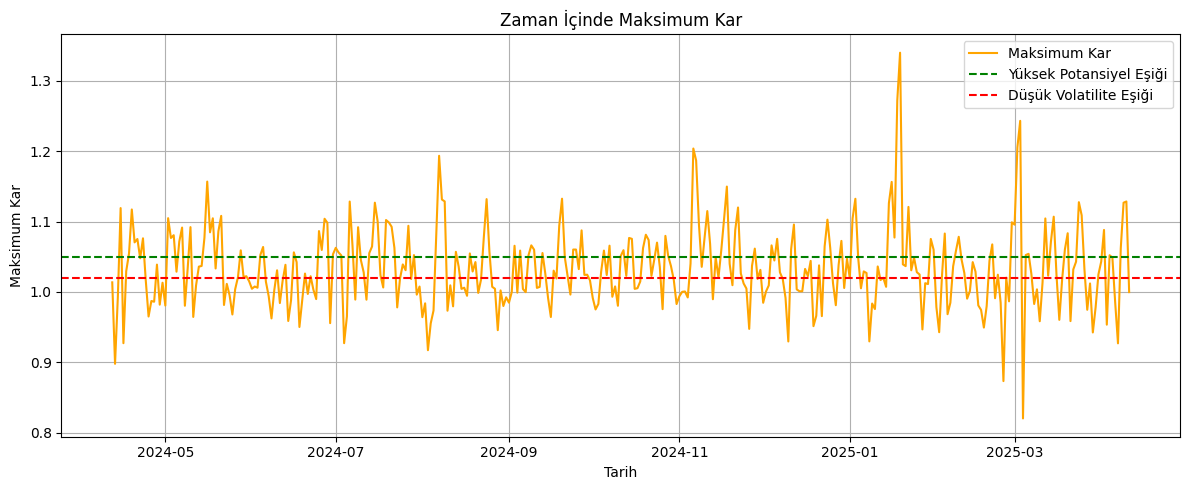

In [50]:
plt.figure(figsize=(12, 5))
plt.plot(data["Datetime"], data["Maksimum Kar"], label="Maksimum Kar", color="orange")
plt.axhline(y=1.05, color='green', linestyle='--', label="Yüksek Potansiyel Eşiği")
plt.axhline(y=1.02, color='red', linestyle='--', label="Düşük Volatilite Eşiği")
plt.title("Zaman İçinde Maksimum Kar")
plt.xlabel("Tarih")
plt.ylabel("Maksimum Kar")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
data["Maksimum Kar Değişim"] = data["Maksimum Kar"].pct_change()


In [52]:
data["Maksimum Kar Değişim"]

0           NaN
1           NaN
2     -0.114281
3      0.105581
4      0.127590
         ...   
361   -0.058855
362    0.146044
363    0.060795
364    0.001552
365   -0.114171
Name: Maksimum Kar Değişim, Length: 366, dtype: float64